<a href="https://colab.research.google.com/github/Luciesprogram/Gen-AI/blob/main/MultiModal_RAG_with_Gemini_Langchian_and_Google_AI_Studio_Yt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --upgrade langchain langchain-google-genai "langchain[docarray]" faiss-cpu pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.1/719.1 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.2/490.2 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.9/234.9 kB 21.2 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.43.0
    Uninstalling google-auth-2.43.0:
      Successfully uninstalled google-auth-2.43.0
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.2.6
    Uninstalling langchain-core-1.2.6:
      Successfully uninstalled langchain-core-1.2.6


In [2]:
import os
import requests
from PIL import Image

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Markdown, display

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [5]:
!pip install -qU langchain_community "docarray"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.43.0, but you have google-auth 2.47.0 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [6]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_community.vectorstores import DocArrayInMemorySearch
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatMessagePromptTemplate

In [7]:
from langchain_core.documents import Document

In [8]:
from langchain_community.document_loaders import TextLoader

In [9]:
from langchain_text_splitters import CharacterTextSplitter

In [10]:
from langchain_community.vectorstores import FAISS

In [11]:
from google.colab import userdata

gemini_api = userdata.get("GEMINI")
os.environ["GEMINI"] = gemini_api

In [12]:
def load_model(model_name):
    if model_name == "gemini-2.5-flash":
        llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", api_key=gemini_api)
    else:
        llm = ChatGoogleGenerativeAI(model="gemini-pro-vision", api_key=gemini_api)

    return llm


In [13]:
model_text = load_model("gemini-2.5-flash")

In [14]:
output = model_text.invoke("Come with a best funny line.")

In [15]:
output.content

'Okay, here are a few options, pick your favorite!\n\n**Option 1 (Relatable & Self-Deprecating):**\n"I\'m not saying I\'m lazy, but if there was a button to automatically make me productive, I probably wouldn\'t bother pressing it."\n\n**Option 2 (Clever & Puns):**\n"I\'m reading a book on anti-gravity. It\'s impossible to put down!"\n\n**Option 3 (Observational & Modern Life):**\n"My bed is a magical place where I suddenly remember everything I was supposed to do."\n\n**Option 4 (A bit dark, but often lands):**\n"My therapist told me I have a preoccupation with vengeance. We\'ll see about that."\n\n**Which one made you chuckle?**'

In [16]:
model_text.invoke([
    HumanMessage(content="Answer with a simple 'Yes' or 'No'. Question: Is apple a fruit?")
]).content


'Yes'

In [17]:
def get_image(url,filename,extension):
  content = requests.get(url).content
  with open(f'/content/{filename}.{extension}','wb') as f:
    f.write(content)
  image = Image.open(f"/content/{filename}.{extension}")
  image.show()
  return image

In [18]:
image_url = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png"

In [19]:
image = get_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png",
                  "nike-shoes",
                  "png")

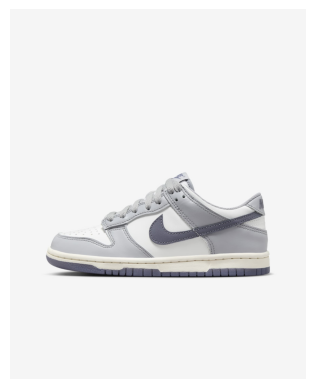

In [20]:
plt.imshow(image)
plt.axis("off")
plt.show()


In [21]:
vision_model = load_model("gemini-2.5-flash")

In [22]:
message= HumanMessage(
    content=[
        {

            "type": "image_url", "image_url": image_url
        }
    ]
)

In [23]:
print(vision_model.invoke([message]).content)

Based on the image, the sneaker is a **Nike Dunk Low**.

The colorway appears to be a combination of white, light grey (often referred to as "Photon Dust" or "Light Smoke Grey" in similar colorways), and a darker purple-grey for the Swoosh, heel branding, and outsole. A common name for a very similar colorway is **Nike Dunk Low "Photon Dust"** or **"Grey Fog"**, though the darker accent here leans a bit more purple.

Given the specific shades, it's most likely the **Nike Dunk Low "Cacao Wow" (GS)** or a similar variant from a recent collection, due to the darker purple-grey accents. However, if focusing strictly on the grey tones, "Photon Dust" or "Grey Fog" are very close. Without a direct product name from Nike, "Nike Dunk Low in White/Grey with Purple-Grey Accents" is also accurate.

A very close match is the **Nike Dunk Low "Purple Pulse"** for the purple accents, but the main grey panels are lighter here.

Therefore, the most accurate identification is:
**Nike Dunk Low**
**Colorwa

In [24]:
prompt="Describe about the image in detail"

In [25]:
message= HumanMessage(
    content=[
         {
            "type": "text",
            "text": prompt,
        },
        {

            "type": "image_url", "image_url": image_url
        }
    ]
)

In [26]:
print(vision_model.invoke([message]).content)

This image displays a single Nike Dunk Low sneaker, presented in a clean, side-profile view against a plain, light greyish-white background. The shoe is oriented with its toe pointing towards the left of the frame.

The sneaker features a two-tone colorway, primarily consisting of white and various shades of a muted, dusty purple-grey.

**Upper:**
*   **Toe Box:** Made of white leather, it is perforated with small holes arranged in a grid pattern, typical for breathability.
*   **Toe Cap/Mudguard:** Overlays the toe box and is crafted from a lighter shade of dusty purple-grey leather.
*   **Side Panels:** The main body of the shoe on the midfoot is white leather.
*   **Swoosh:** The iconic Nike Swoosh logo, prominently displayed on the side, is a darker, more saturated shade of dusty purple-grey, contrasting with the lighter grey overlays.
*   **Eyestays/Lace Guards:** These panels, through which the laces pass, are made of the lighter dusty purple-grey leather, matching the toe cap.
*

In [31]:
loader = TextLoader("/content/Nike’s sneaker_sandals.txt").load()

In [33]:
print(loader[0].page_content)

Nike’s sneaker catalog is a blend of iconic heritage models and aggressive technical innovation. The brand has categorized its lineup into three primary pillars: Performance (Running/Sport), Lifestyle (Streetwear), and Recovery/Mind Science.



1. Performance & Running Technology
Nike has moved toward consolidating its running line into three main franchises: Pegasus, Vomero, and Structure.

Nike Pegasus 41: The "workhorse" of the lineup. It remains a versatile daily trainer featuring a combination of ReactX foam and Zoom Air units in the forefoot and heel. It is designed for those who need a reliable shoe that can handle road, light trail, and gym work.

Nike Vomero 18 / Vomero Plus: This is Nike's premier "max-cushion" trainer. The Vomero 18 features a massive stack height (46mm in the heel) using a dual-density setup: a top layer of bouncy ZoomX and a stable bottom layer of ReactX. The Vomero Plus is even more high-end, utilizing a full-length ZoomX midsole for maximum energy return

In [39]:
def get_text_chunk_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20,chunk_overlap=5)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs

In [40]:
data = loader[0].page_content
docs = get_text_chunk_langchain(data)

In [46]:
embeddings = GoogleGenerativeAIEmbeddings(model="gemini-embedding-001",api_key=gemini_api)

In [47]:
vectorstores = FAISS.from_documents(docs,embedding=embeddings)

In [48]:
reteriver = vectorstores.as_retriever()

In [67]:
for i in range(len(reteriver.invoke("nike slides/sandals"))):
  print(reteriver.invoke("nike slides/sandals")[i].page_content)
  print()

Nike’s slide and sandal offerings, it is important to understand the different technologies and use-cases the brand targets, ranging from poolside utility to high-performance recovery.

Outdoor and Rugged Options: Nike ACG
The ACG (All Conditions Gear) line offers sandals like the Nike ACG Air Deschutz+. Unlike the slides mentioned above, this is a true performance sandal with multiple adjustable straps and a heavy-duty rubber outsole. It features an encapsulated Air unit in the heel, making it suitable for light hiking and water activities where foot security is a priority.

The Nike Calm Lineup
The Nike Calm series represents the brand's shift toward minimalist, sustainable-looking design. These slides and sandals are made from a single piece of contoured foam that is designed to be water-friendly and easy to clean. The footbed features a subtle texture to keep the foot from slipping when wet, while the outsole mimics the traction patterns of classic Nike sneakers (like the AF1) to p

In [65]:
len(reteriver.invoke("nike slides/sandals"))

4

In [68]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

In [78]:
template = """
'''
{context}
'''

{query}

provide the breif information about the product features and usecases.

"""

In [72]:
from langchain_core.prompts import ChatPromptTemplate

In [79]:
prompt = ChatPromptTemplate.from_template(template)

In [80]:
rag_chain = (
    {"context": reteriver, "query":RunnablePassthrough()}
    |prompt
    |model_text
    |StrOutputParser()

)

In [81]:
result = rag_chain.invoke("can you give me a detail of nike sandal?")

In [82]:
print(result)

Nike offers a diverse range of sandals and slides, catering to various needs from casual comfort to rugged outdoor performance. Here's a breakdown of some key lines:

### 1. Nike ACG (All Conditions Gear) - Outdoor and Rugged Options

*   **Product Features:**
    *   **True Performance Sandal:** Designed for more demanding activities than typical slides.
    *   **Adjustable Straps:** Multiple straps provide a secure, customizable fit.
    *   **Heavy-Duty Rubber Outsole:** Offers robust traction and durability.
    *   **Encapsulated Air Unit:** Located in the heel for cushioning and support.
*   **Use Cases:** Light hiking, water activities, and situations where foot security and durability are paramount.

### 2. The Nike Calm Lineup - Minimalist & Water-Friendly

*   **Product Features:**
    *   **Minimalist Design:** Clean, sustainable-looking aesthetic.
    *   **Single-Piece Contoured Foam:** Made from one piece of material, making them water-friendly and easy to clean.
    *  

In [84]:
display(Markdown(result))

Nike offers a diverse range of sandals and slides, catering to various needs from casual comfort to rugged outdoor performance. Here's a breakdown of some key lines:

### 1. Nike ACG (All Conditions Gear) - Outdoor and Rugged Options

*   **Product Features:**
    *   **True Performance Sandal:** Designed for more demanding activities than typical slides.
    *   **Adjustable Straps:** Multiple straps provide a secure, customizable fit.
    *   **Heavy-Duty Rubber Outsole:** Offers robust traction and durability.
    *   **Encapsulated Air Unit:** Located in the heel for cushioning and support.
*   **Use Cases:** Light hiking, water activities, and situations where foot security and durability are paramount.

### 2. The Nike Calm Lineup - Minimalist & Water-Friendly

*   **Product Features:**
    *   **Minimalist Design:** Clean, sustainable-looking aesthetic.
    *   **Single-Piece Contoured Foam:** Made from one piece of material, making them water-friendly and easy to clean.
    *   **Subtle Footbed Texture:** Helps prevent the foot from slipping when wet.
    *   **Outsole Traction:** Mimics classic Nike sneaker patterns (e.g., AF1) for grip on various surfaces.
    *   **Available Forms:** Traditional slide, flip-flop, and the "Calm Mule" which includes a removable heel strap for added security.
*   **Use Cases:** Everyday casual wear, poolside, beach, post-activity recovery, and situations requiring easy cleaning and good wet-surface traction.

### 3. The Nike Offcourt Series - Premium Comfort Slide

*   **Product Features:**
    *   **Premium Comfort:** Marketed specifically for superior comfort.
    *   **Dual-Layered Foam:** Features a firm carrier foam for durability paired with a very soft "Revive" foam footbed for immediate, plush comfort.
    *   **Lined Strap:** Often lined with soft jersey or fleece fabric for a comfortable feel against the foot, especially for "socks and slides" wear.
    *   **"Adjust" Version:** Available with a Velcro strap for a customized fit, accommodating different foot widths or high arches.
*   **Use Cases:** Everyday comfort, post-workout recovery, casual wear, and for those who prioritize a soft, cushioned experience.

In [99]:
full_chain = (
    RunnablePassthrough() | vision_model | StrOutputParser() | rag_chain
)

In [87]:
rag_chain

{
  context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x791fc459d970>, search_kwargs={}),
  query: RunnablePassthrough()
}
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template="\n'''\n{context}\n'''\n\n{query}\n\nprovide the breif information about the product features and usecases.\n\n"), additional_kwargs={})])
| ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, g

In [88]:
full_chain

RunnableLambda(RunnablePassthrough)
| ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-2.5-flash', client=<google.genai.client.Client object at 0x791fcdb8bf20>, default_metadata=(), model_kwargs={})
| RunnableLambda(StrOutputParser)
| {
    context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x791fc459d970>, search_kwargs={}),
    query: RunnablePassthrough()
  }
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(pro

In [90]:
img1_url = "https://static.nike.com/a/images/t_web_pdp_535_v2/f_auto,u_9ddf04c7-2a9a-4d76-add1-d15af8f0263d,c_scale,fl_relative,w_1.0,h_1.0,fl_layer_apply/1284dcd0-de75-4f5e-856f-c173a79482ee/NIKE+CALM+SLIDE+-+REALTREE.png"

In [92]:
image1 = get_image(img1_url,"nike1","png")

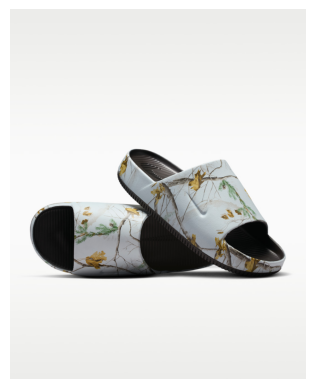

In [93]:
plt.imshow(image1)
plt.axis("off")
plt.show()

In [100]:
result = full_chain.invoke([message])

In [ ]:
{
            "type": "text",
            "text": "Provide information on given sandle image Brand and model.",
        },

In [102]:
img2_url = "https://static.nike.com/a/images/t_web_pdp_535_v2/f_auto,u_126ab356-44d8-4a06-89b4-fcdcc8df0245,c_scale,fl_relative,w_1.0,h_1.0,fl_layer_apply/b2e538a6-79f7-4e1f-90d0-adc1e359872d/AIR+JORDAN+4+RETRO+OG+FC.png"

In [103]:
image2 = get_image(img2_url,"nike","png")

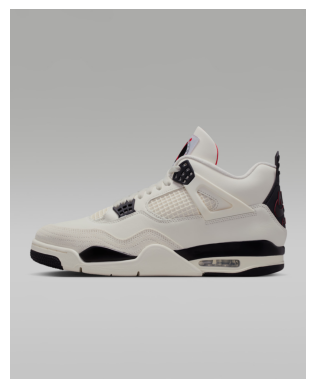

In [104]:
plt.imshow(image2)
plt.axis("off")
plt.show()


In [109]:
message = HumanMessage(
    content=[
        {
            "type":"text",
            "text":"You will provide the information about the product and its model."
        },
        # You can optionally provide text parts
        {"type": "image_url", "image_url": img2_url},
    ]
)

In [110]:
result2 = full_chain.invoke([message])

In [111]:
display(Markdown(result2))

Based on the identification of the **Air Jordan 4 Retro SE "Craft"**:

**Product Features:**
*   **Iconic Design:** Retains the classic Air Jordan 4 silhouette, celebrated for its unique "wings" lacing system, visible Air cushioning unit, and distinctive mesh netting on the side panels (though often reinterpreted with debossed leather or suede on "Craft" editions).
*   **Premium Materials:** The "Craft" designation highlights an elevated material treatment, often featuring a luxurious mix of high-quality suede, leather, and textile fabrics in a sophisticated, often monochromatic or muted color palette.
*   **Comfort:** Incorporates Nike Air cushioning in the heel and forefoot for comfortable wear, consistent with its original design intent.
*   **Branding:** Features the iconic Jumpman logo on the tongue, heel, and outsole.

**Use Cases:**
*   **Lifestyle & Streetwear:** Primarily worn as a fashion statement and a key component of contemporary streetwear outfits. Its iconic status and premium build make it highly desirable for casual wear.
*   **Collecting:** A popular item among sneaker enthusiasts and collectors due to its heritage, design, and often limited release.
*   **Casual Wear:** Ideal for everyday activities, social gatherings, and urban exploration where style and comfort are prioritized.
*   **Fashion Statement:** Serves as a centerpiece for outfits, reflecting an appreciation for sneaker culture and heritage.

In [115]:
for i in range(len(reteriver.invoke("nike Air Jordan 4 Retro"))):
  print(reteriver.invoke("nike Air Jordan 4 Retro")[i].page_content)

3. Jordan Brand Highlights
For 2026, Jordan Brand is focusing heavily on "Retros" of original colorways while pushing signature performance for active players.
The "Big Three" Retros: Rumored and confirmed 2026 releases include the Air Jordan 9 "Flint Grey", Air Jordan 5 "Wolf Grey", and the 35th-anniversary Air Jordan 6 "White Infrared" featuring original "Nike Air" heel branding.
Nike Shox R4: 2026 has seen a major revival of the "Boing" era, with the Shox R4 being a staple in fashion-forward, tech-wear circles.
2. Lifestyle & Heritage Icons
These models dominate global streetwear and prioritize aesthetic appeal and historical significance over high-performance specs.


In [116]:
full_chain

RunnablePassthrough()
| ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-2.5-flash', client=<google.genai.client.Client object at 0x791fcdb8bf20>, default_metadata=(), model_kwargs={})
| StrOutputParser()
| {
    context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x791fc459d970>, search_kwargs={}),
    query: RunnablePassthrough()
  }
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_var